In [1]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import shuffle
import os
from keras.models import Model, Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.utils import plot_model
from keras.applications import VGG16, ResNet50
from keras.optimizers import RMSprop,Adam    #import activation function that you need
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau 


D:\TOOLS\Anaconda\envs\tf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\TOOLS\Anaconda\envs\tf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\TOOLS\Anaconda\envs\tf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\TOOLS\Anaconda\envs\tf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
print(os.listdir(os.getcwd()))

['.ipynb_checkpoints', 'cat (1).jpg', 'cat (2).jpg', 'cat (3).jpg', 'cat (4).jpg', 'cat (5).jpg', 'cats_dogs_mobilenet.ipynb', 'cats_dogs_mobilenet_10epochs', 'cats_dogs_mobilenet_10epochs.pickle', 'cats_dogs_newdataset_10epochs', 'cats_dogs_sgd_10epochs', 'cats_dogs_vgg16.ipynb', 'cats_dogs_vgg_version_2.h5', 'cats_dogs_vgg_version_2.ipynb', 'cats_dogs_vgg_version_2.pickle', 'cats_dogs_vgg_weight.h5', 'cats_vs_dogs_V1.h5', 'dog (1).jpg', 'dog (2).jpg', 'dog (3).jpg', 'dog (4).jpg', 'dog (5).jpg', 'dog (6).jpg', 'dogs_cats_vgg16_10epochs', 'test_model.ipynb', 'test_set', 'test_set_2', 'test_version_2.ipynb', 'training_set', 'training_set_2', 'udemy_vgg.ipynb', 'udemy_vgg_64.h5', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb']


In [3]:
#prepare training data

filenames = os.listdir("training_set_2")
shuffle(filenames) #shuffling the training data atfirst jate serially na thake
categories = []
for filename in filenames:
    category = filename.split('.')[0]  #dog.1->['dog',1]-> thakle basically split kore dog ta dhukabe category te
    if category == 'dog':
        categories.append(str(1)) #binary classification e category ta string hoite hoi for some reason,multiclass e janin.String na hoile just str() part ta shorai dite hobea
    else:
        categories.append(str(0))

df = pd.DataFrame({                 #this makes an excel file 
    'filename': filenames,
    'category': categories
})
df.head()

filename category
0  cat.1336.jpg        0
1  dog.4145.jpg        1
2  cat.9209.jpg        0
3  cat.4389.jpg        0
4  dog.3570.jpg        1

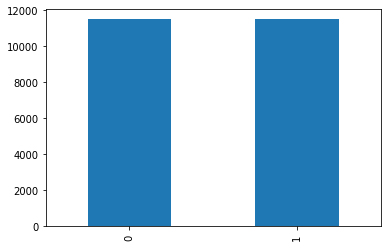

In [98]:
#see bar plot
df['category'].value_counts().plot.bar() #labels dekhaitese koita one koita zero

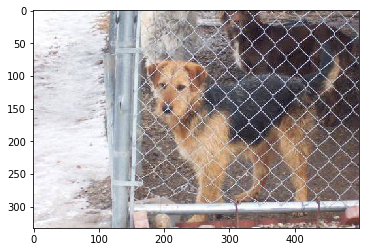

In [99]:
#see sample
sample = random.choice(filenames)
image = load_img("training_set_2/"+sample)
plt.imshow(image)

In [25]:
#build model
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.models import Model

In [11]:
img_row = 64
img_col = 64
epochs = 15
batch_size = 32

pre_trained_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_row,img_col,3)) #taking pretrained weights;top layer chopped off as i am going to use it of my own;
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False  #freeze upto 15th layer only of vgg16

for layer in pre_trained_model.layers[15:]:
    layer.trainable = False  #eikhane true dilei fine tuning hoito vgg16

In [6]:
def addTopModelVGG(bottom_model, num_classes):          #our customized topmodel as we chopped VGG16's top model ;here bottom_model means our vgg16

    top_model = bottom_model.output #output of vgg16 last layer taken as input here
    top_model = GlobalMaxPooling2D()(top_model)
    #top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    #top_model = Dense(256,activation='relu')(top_model)
    #top_model = Dense(128,activation='relu')(top_model)
    #top_model = Dense(128,activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(num_classes,activation='sigmoid')(top_model)

    return top_model

num_classes = 1 #2 classes

FC_Head = addTopModelVGG(pre_trained_model,num_classes)  #gives the top layer for our model

In [7]:
model = Model(inputs = pre_trained_model.input, outputs = FC_Head) #this is our customized model which contains vgg16 and then our own made fully connected layer in the output side; MODEL is imported from keras.models;
                                                      #VGG.input means the i/p we get from vgg16

In [52]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [8]:
#prepare test and train data

train_df, validate_df = train_test_split(df, test_size=0.1)#df is the dataframe;train_test_split er prothom
train_df = train_df.reset_index()                #arguement ta has to be a pd.dataframe,np.array or list
validate_df = validate_df.reset_index() #ekdom shamner index gula 0 theke shuru hoi age jai thakuk
                                        #test_size determines kottuk test set e thakbe
# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

print(total_train)
print(total_validate)
#eikhane training_set thekei train ar test e bhag kore nise oitar amount

20700
2300


In [9]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "training_set_2/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(img_row, img_col),
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "training_set_2/", #duitai training file theke kintu
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(img_row, img_col),
    batch_size=batch_size
)

Found 20700 validated image filenames belonging to 2 classes.
Found 2300 validated image filenames belonging to 2 classes.


In [10]:
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=.001),
             metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
from keras.optimizers import RMSprop,Adam    #import activation function that you need
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau 



learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', #helps to monitor if val_loss;if it doesn't reduce after 5 epochs, the learning rate will be decreased and checked again in the same way;this will be done upto lr=.001
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)

callbacks=[learning_rate_reduction]

In [13]:
# fine-tune the model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)


Epoch 1/15
646/646 [==============================] - 850s 1s/step - loss: 0.5287 - accuracy: 0.7317 - val_loss: 0.4398 - val_accuracy: 0.7839
Epoch 2/15
646/646 [==============================] - 493s 762ms/step - loss: 0.4897 - accuracy: 0.7583 - val_loss: 0.3314 - val_accuracy: 0.7831
Epoch 3/15
646/646 [==============================] - 298s 462ms/step - loss: 0.4798 - accuracy: 0.7654 - val_loss: 0.3396 - val_accuracy: 0.7945
Epoch 4/15
646/646 [==============================] - 256s 396ms/step - loss: 0.4746 - accuracy: 0.7688 - val_loss: 0.4997 - val_accuracy: 0.7875
Epoch 5/15
646/646 [==============================] - 998s 2s/step - loss: 0.4675 - accuracy: 0.7742 - val_loss: 0.4100 - val_accuracy: 0.7941
Epoch 6/15
646/646 [==============================] - 262s 406ms/step - loss: 0.4638 - accuracy: 0.7736 - val_loss: 0.5961 - val_accuracy: 0.7950
Epoch 7/15
646/646 [==============================] - 276s 428ms/step - loss: 0.4613 - accuracy: 0.7787 - val_loss: 0.4541 - val_

In [14]:
model.save('cats_dogs_vgg_version_2.h5')

In [ ]:
from keras.models import load_model
model=load_model('cats_dogs_vgg_version_2.h5')

In [15]:
#saving the history file as a pickle

import pickle 

pickle_out = open("cats_dogs_vgg_version_2.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

In [16]:
#loading out the saved pickle folder

pickle_in = open("cats_dogs_vgg_version_2.pickle","rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'val_loss': [0.4398428499698639, 0.33143600821495056, 0.33957439661026, 0.49972617626190186, 0.40996691584587097, 0.5960857272148132, 0.45414382219314575, 0.3680385947227478, 0.26773154735565186, 0.43777644634246826, 0.5186635851860046, 0.2842731475830078, 0.3292415738105774, 0.26521116495132446, 0.3223947286605835], 'val_accuracy': [0.7838908433914185, 0.7830687761306763, 0.7945326566696167, 0.787477970123291, 0.7940917015075684, 0.7949735522270203, 0.802028238773346, 0.8073192238807678, 0.803791880607605, 0.8090828657150269, 0.8077601194381714, 0.8024691343307495, 0.8059964776039124, 0.8059964776039124, 0.8086419701576233], 'loss': [0.5286637805106679, 0.48967227293025234, 0.479762590436749, 0.47465024119953547, 0.4674875730411075, 0.4637967697974674, 0.461267113235718, 0.4458099365268982, 0.43835799151194127, 0.43621661257231653, 0.4378855020897933, 0.43665930880830256, 0.4366571103866681, 0.4331414215980472, 0.4286892041088143], 'accuracy': [0.73166245, 0.75832206, 0.7653861, 0.76

In [129]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.789613  ;  loss = 0.534612 


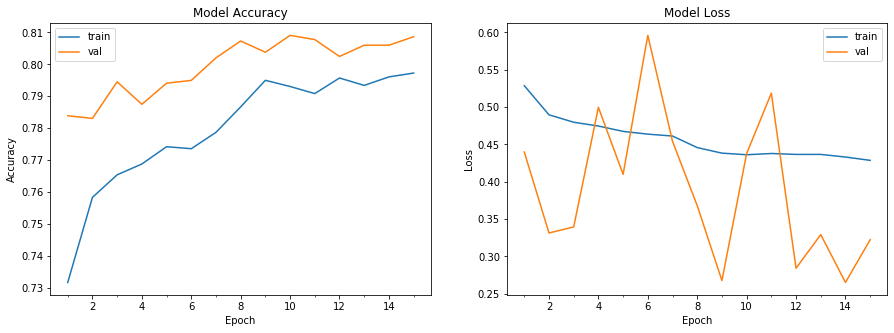

In [18]:
#plotting the model
import numpy as np
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)

In [19]:
Y_val = validate_df['category']
y_pred =  model.predict_generator(validation_generator)

In [20]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)
y_final.size

2300

In [28]:
from sklearn import preprocessing #ei part ta na korle confusion matrix ashe na
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
Y_val=df['category'] = le.fit_transform(df['category'].astype(str))
#Y_val=np.transpose(Y_val)
Y_val

array([0, 1, 0, ..., 0, 1, 0])

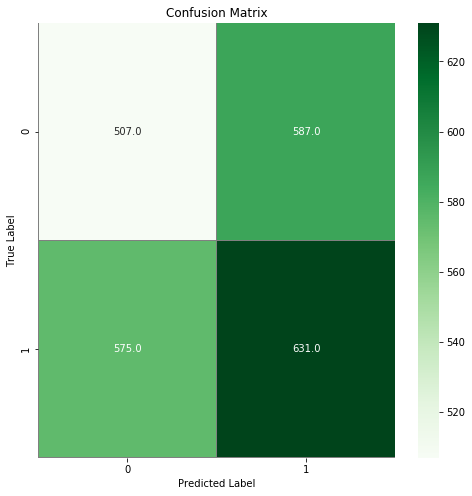

In [31]:
import matplotlib
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_val[0:2300], y_final) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_val[0:2300], y_final, target_names=['0','1'])

print(report)

              precision    recall  f1-score   support

           0       0.47      0.46      0.47      1094
           1       0.52      0.52      0.52      1206

    accuracy                           0.49      2300
   macro avg       0.49      0.49      0.49      2300
weighted avg       0.49      0.49      0.49      2300

